In [1]:
import xarray as xr
import rioxarray
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cdf(data):
    # compute cdf values for a 1D array of data
    data = data[~np.isnan(data)] # remove any NaN values
    x = np.sort(data) #sort data
    y = 1. * np.arange(len(data)) / (len(data) - 1) #calculate CDF values
    return x, y

In [3]:
base_filepath = 'C:/Users/steve/OneDrive/Documents/School Stuff/UW/Mountain Hydrology Research Group/Snow Sensor Usability Paper - Passive Microwave/sensitivity_test_results/ssum_output/'

### Noah MP GDAS
band 0 = MODIS LST; band 1 = Hansen et al., TCC; band 2 = NoahMP GDAS SWE; band 3 = classes

In [4]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_noahmp_ecmwf_150_tcc_20-30.tif')
gdas = ds.isel(band=2)

# compute NoahMP GDAS CDF
gdas_cdf_x, gdas_cdf_y = cdf(gdas.values.ravel())
# convert to a pandas dataframe
gdas_cdf_df = pd.DataFrame(data={'cdf_x': gdas_cdf_x, 'cdf_y': gdas_cdf_y})
# export CDF values to a csv file
gdas_cdf_df.to_csv('quebec_swe_noahmp_gdas_febmean_mm_CDF.csv')

### Noah MP ECMWF & TCC
band 0 = MODIS LST; band 1 = Hansen et al., TCC; band 2 = NoahMP ECMWF SWE; band 3 = classes

In [5]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_noahmp_gdas_150_tcc_20-30.tif')
ecmwf = ds.isel(band=2)
tcc = ds.isel(band=1)

# compute NoahMP ECMWF CDF
ecmwf_cdf_x, ecmwf_cdf_y = cdf(ecmwf.values.ravel())
# convert to a pandas dataframe
ecmwf_cdf_df = pd.DataFrame(data={'cdf_x': ecmwf_cdf_x, 'cdf_y': ecmwf_cdf_y})
# export CDF values to a csv file
ecmwf_cdf_df.to_csv('quebec_swe_noahmp_ecmwf_febmean_mm_CDF.csv')

# compute TCC CDF
tcc_cdf_x, tcc_cdf_y = cdf(tcc.values.ravel())
# convert to a pandas dataframe
tcc_cdf_df = pd.DataFrame(data={'cdf_x': tcc_cdf_x, 'cdf_y': tcc_cdf_y})
# export CDF values to a csv file
tcc_cdf_df.to_csv('quebec_tcc_CDF.csv')

### GlobSnow & LAI
band 0 = MODIS LST; band 1 = MODIS LAI; band 2 = GlobSnow SWE; band 3 = classes

In [6]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_globsnow_150_lai_18-38.tif')
globsnow = ds.isel(band=2)
lai = ds.isel(band=1)

# compute GlobSnow CDF
globsnow_cdf_x, globsnow_cdf_y = cdf(globsnow.values.ravel())
# convert to a pandas dataframe
globsnow_cdf_df = pd.DataFrame(data={'cdf_x': globsnow_cdf_x, 'cdf_y': globsnow_cdf_y})
# export CDF values to a csv file
globsnow_cdf_df.to_csv('quebec_swe_globsnow_febmean_mm_CDF.csv')

# compute LAI CDF
lai_cdf_x, lai_cdf_y = cdf(lai.values.ravel())
# convert to a pandas dataframe
lai_cdf_df = pd.DataFrame(data={'cdf_x': lai_cdf_x, 'cdf_y': lai_cdf_y})
# export CDF values to a csv file
lai_cdf_df.to_csv('quebec_lai_CDF.csv')

---

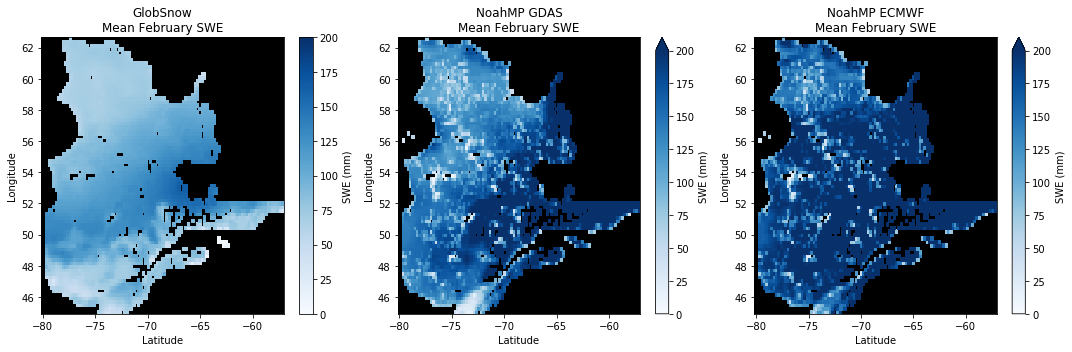

In [7]:
### Map plots ###
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True,gridspec_kw={'width_ratios': [1, 1, 1]})
[ax1, ax2, ax3] = ax.ravel()

globsnow.plot(ax=ax1, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# NoahMP GDAS map
gdas.plot(ax=ax2, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# NoahMP ECMWF map
ecmwf.plot(ax=ax3, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# format map plots
ax1.set_title('GlobSnow\nMean February SWE')
ax2.set_title('NoahMP GDAS\nMean February SWE')
ax3.set_title('NoahMP ECMWF\nMean February SWE')

for this_ax in ax:
    this_ax.set_ylabel('Longitude')
    this_ax.set_xlabel('Latitude')
    this_ax.set_facecolor("black")

# save figure
plt.savefig('quebec-swe-maps-mountainsmasked.jpg')

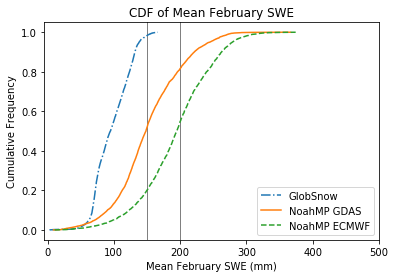

In [8]:
### CDF plot ###
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=False)

# GlobSnow CDF
ax.plot(globsnow_cdf_x, globsnow_cdf_y, '-.', label='GlobSnow')

# NoahMP GDAS CDF
ax.plot(gdas_cdf_x, gdas_cdf_y, '-', label='NoahMP GDAS')

# NoahMP ECMWF CDF
ax.plot(ecmwf_cdf_x, ecmwf_cdf_y, '--', label='NoahMP ECMWF')

# add vertical lines for max SWE thresholds
ax.axvline(150, c='grey', lw=1, zorder=-99)
ax.axvline(200, c='grey', lw=1, zorder=-99)

# format CDF plot
ax.set_xlim((-5,500))
ax.set_title('CDF of Mean February SWE')
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('Mean February SWE (mm)')
ax.legend(loc='lower right');

# save figure
plt.savefig('quebec-swe-cdfs-mountainsmasked.jpg')

---

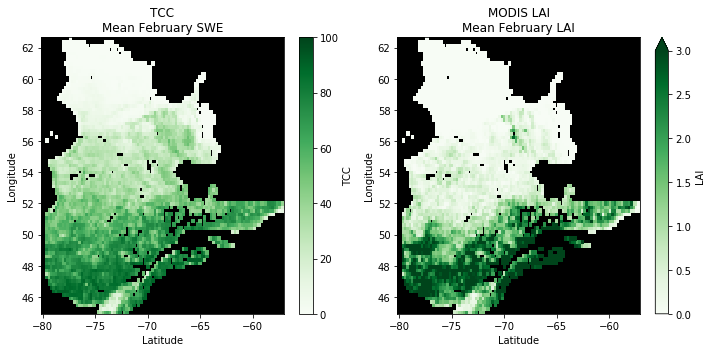

In [9]:
### Map plots ###
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,gridspec_kw={'width_ratios': [1, 1]})
[ax1, ax2] = ax.ravel()

# TCC map
tcc.plot(ax=ax1, vmin=0, vmax=100, cmap='Greens', cbar_kwargs={'label': 'TCC'})

# LAI map
lai.plot(ax=ax2, vmin=0, vmax=3, cmap='Greens', cbar_kwargs={'label': 'LAI'})


# format map plots
ax1.set_title('TCC\nMean February SWE')
ax2.set_title('MODIS LAI\nMean February LAI')

for this_ax in ax:
    #this_ax.set_ylim(24,72)
    this_ax.set_ylabel('Longitude')
    this_ax.set_xlabel('Latitude')
    this_ax.set_facecolor("black")

# save figure
plt.savefig('quebec-forest-maps-mountainsmasked.jpg')

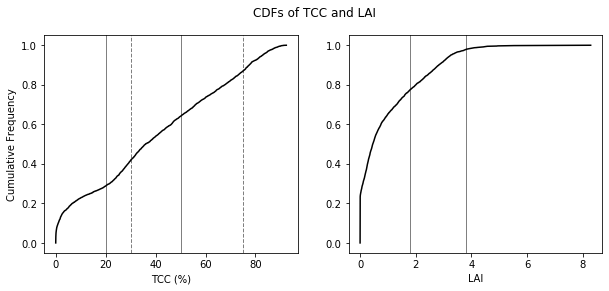

In [10]:
### CDF plot ###
fig, [ax, ax2] = plt.subplots(nrows=1,ncols=2,figsize=(10,4),tight_layout=False)

#ax2 = ax.twiny() # make second x axis

# TCC CDF
ax.plot(tcc_cdf_x, tcc_cdf_y, '-', c='k', label='TCC')
# add vertical lines for TCC thresholds
ax.axvline(20, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(30, c='grey', linestyle='--', lw=1, zorder=-99)
ax.axvline(50, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(75, c='grey', linestyle='--', lw=1, zorder=-99)

# LAI CDF
ax2.plot(lai_cdf_x, lai_cdf_y, '-', c='k', label='MODIS LAI')
# add vertical lines for LAI thresholds
ax2.axvline(1.8, c='grey', lw=1, zorder=-99)
ax2.axvline(3.8, c='grey', lw=1, zorder=-99)
# format CDF plot
#ax.set_xlim((-5,100))
fig.suptitle('CDFs of TCC and LAI')
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('TCC (%)')
ax2.set_xlabel('LAI')
#ax.legend(loc=(.75,.25), frameon=False);
#ax2.legend(loc=(.75,.18), frameon=False);

# save figure
plt.savefig('quebec-forest-cdfs-mountainsmasked.jpg')

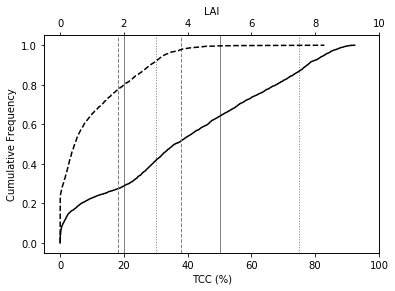

In [21]:
### CDF plot ###
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=False)

#ax2 = ax.twiny() # make second x axis

# TCC CDF
ax.plot(tcc_cdf_x, tcc_cdf_y, '-', c='k', label='TCC')
# add vertical lines for TCC thresholds
ax.axvline(20, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(30, c='grey', linestyle=':', lw=1, zorder=-99)
ax.axvline(50, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(75, c='grey', linestyle=':', lw=1, zorder=-99)

ax2 = ax.twiny()
# LAI CDF
ax2.plot(lai_cdf_x, lai_cdf_y, '--', c='k', label='MODIS LAI')
# add vertical lines for LAI thresholds
ax2.axvline(1.8, c='grey', lw=1, linestyle='--', zorder=-99)
ax2.axvline(3.8, c='grey', lw=1, linestyle='--', zorder=-99)
# format CDF plot
ax.set_xlim((-5,100))
#fig.suptitle('CDFs of TCC and LAI')
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('TCC (%)')
ax2.set_xlabel('LAI')
ax2.set_xlim((-.5,10))
#ax.legend(loc=(.75,.25), frameon=False);
#ax2.legend(loc=(.75,.18), frameon=False);

# save figure
plt.savefig('quebec-forest-cdfs-mountainsmasked-combined.jpg')